# 데이터분석 캡스톤디자인 프로젝트

In [1]:
#기본 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import stat

## 1. 데이터 확인

In [2]:
#고객 특성 csv 파일 읽기 - 고객 회원 여부 예측, 시각화
df_client19 = pd.read_csv('고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2019.csv')
df_client20 = pd.read_csv('고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2020.csv')
df_client21 = pd.read_csv('고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2021.csv')

In [3]:
#역별 실적 csv 파일 읽기 - 시각화
df_station18 = pd.read_csv('역별 승하차실적_2018.csv')
df_station19 = pd.read_csv('역별 승하차실적_2019.csv')
df_station20 = pd.read_csv('역별 승하차실적_2020.csv')
df_station21 = pd.read_csv('역별 승하차실적_2021.csv')

In [4]:
#고객 특성 데이터 합치기
df_client = pd.concat([df_client19, df_client20, df_client21], ignore_index=True)
df_client.tail()

운행일자 운행요일  구분  출발시간대 성별     연령대 고객등급_현재    출발역코드 출발역명    도착역코드  \
1632175  20210531    월  회원   23.0  M  20~29세       F  3900195  서대전  3900248   
1632176  20210531    월  회원   23.0  M  20~29세       F  3900259   남원  3900248   
1632177  20210531    월  회원   23.0  M  30~39세       F  3900195  서대전  3900248   
1632178  20210531    월  회원   23.0  M  40~49세       F  3900271   순천  3900248   
1632179  20210531    월  회원   23.0  M  50~59세       F  3900141   만종  3900587   

        도착역명 상하행구분    노선  역무열차종코드   역무열차종  인원  
1632175   전주     D  1040        2    무궁화호   1  
1632176   전주     U   943        2    무궁화호   1  
1632177   전주     D  1040        2    무궁화호   2  
1632178   전주     U   943        2    무궁화호   1  
1632179   강릉     D  2134       10  KTX-호남   1

In [5]:
#역별 실적 데이터 합치기
df_station = pd.concat([df_station18, df_station19, df_station20, df_station21], ignore_index=True)
df_station.tail()

운행일자 운행영업일단계 주운행선 상행하행구분   역무열차종  정차역  메트릭 승차인원수 하차인원수
1900117  2021년 05월 31일      평일  강릉선     상행  KTX-호남  서원주  NaN    19    16
1900118  2021년 05월 31일      평일  강릉선     상행  KTX-호남   횡성  NaN   191    32
1900119  2021년 05월 31일      평일  강릉선     상행  KTX-호남   둔내  NaN   124     6
1900120  2021년 05월 31일      평일  강릉선     상행  KTX-호남   평창  NaN   152    25
1900121  2021년 05월 31일      평일  강릉선     상행  KTX-호남   진부  NaN   236    21

In [6]:
#코레일 이용 고객들의 회원 수, 비회원 수 (class label)
df_client['구분'].value_counts()

회원     1355242
비회원     276938
Name: 구분, dtype: int64

## 2. 데이터 전처리 

In [7]:
#고객 데이터 결측치 확인
df_client.isnull().sum()

운행일자            0
운행요일            0
구분              0
출발시간대          31
성별         276938
연령대             0
고객등급_현재    276938
출발역코드           0
출발역명            0
도착역코드           0
도착역명            0
상하행구분           0
노선              0
역무열차종코드         0
역무열차종           0
인원              0
dtype: int64

비회원 데이터는 성별, 고객등급이 존재하지 않음을 확인 가능

In [8]:
# 성별, 고객등급 column은 회원 예측 이전에 제거하기 (시각화 완료 후)

In [9]:
#출발시간대 column에 결측치가 있는 행 제거
df_client.dropna(subset=['출발시간대'],inplace=True)
df_client

운행일자 운행요일   구분  출발시간대   성별     연령대 고객등급_현재    출발역코드 출발역명  \
0        20190301    금  비회원    0.0  NaN      기타     NaN  3900248   전주   
1        20190301    금  비회원    0.0  NaN      기타     NaN  3900248   전주   
2        20190301    금  비회원    0.0  NaN      기타     NaN  3900248   전주   
3        20190301    금  비회원    2.0  NaN      기타     NaN  3900248   전주   
4        20190301    금  비회원    2.0  NaN      기타     NaN  3900248   전주   
...           ...  ...  ...    ...  ...     ...     ...      ...  ...   
1632175  20210531    월   회원   23.0    M  20~29세       F  3900195  서대전   
1632176  20210531    월   회원   23.0    M  20~29세       F  3900259   남원   
1632177  20210531    월   회원   23.0    M  30~39세       F  3900195  서대전   
1632178  20210531    월   회원   23.0    M  40~49세       F  3900271   순천   
1632179  20210531    월   회원   23.0    M  50~59세       F  3900141   만종   

           도착역코드   도착역명 상하행구분    노선  역무열차종코드   역무열차종  인원  
0        3900211     익산     U   943        2    무궁화호  12  
1        3900259     남원     D  1040        2    무궁화호   4  
2        3900279  여수엑스포     D  1040        2    무궁화호   1  
3        3900276     여천     D  1040        2    무궁화호   3  
4        3900259     남원     D  1040        2    무궁화호   4  
...          ...    ...   ...   ...      ...     ...  ..  
1632175  3900248     전주     D  1040        2    무궁화호   1  
1632176  3900248     전주     U   943        2    무궁화호   1  
1632177  3900248     전주     D  1040        2    무궁화호   2  
1632178  3900248     전주     U   943        2    무궁화호   1  
1632179  3900587     강릉     D  2134       10  KTX-호남   1  

[1632149 rows x 16 columns]

In [10]:
df_client['연령대'].value_counts()

20~29세    342628
30~39세    285199
40~49세    280198
기타        277372
50~59세    235120
60~64세     78645
65세이상      70144
0~19세      62843
Name: 연령대, dtype: int64

In [11]:
#연령대 column의 값을 알아보기 쉽도록 수정
client_age_map = {
    '0~19세' : '미성년자',
    '20~29세' : '20대',
    '30~39세' : '30대',
    '40~49세' : '40대',
    '50~59세' : '50대',
    '60~64세' : '60세 이상',
    '65세이상' : '60세 이상'
}
df_client['연령대'] = df_client['연령대'].map(client_age_map)

In [12]:
df_non_member = df_client[df_client['구분'] == '비회원']
df_non_member['연령대'].unique()

array([nan], dtype=object)

비회원 데이터는 연령대가 존재하지 않음을 알 수 있다.

In [13]:
df_client['상하행구분'].value_counts()

U    817535
D    814614
Name: 상하행구분, dtype: int64

In [14]:
df_client['고객등급_현재'].value_counts()

F    907682
D    274769
B    123942
A     48388
*       245
E       216
Name: 고객등급_현재, dtype: int64

In [15]:
df_client['역무열차종'].value_counts()

KTX-호남     401322
KTX-산천     385933
KTX        384267
무궁화호       381297
ITX-새마을     59581
누리로         15665
새마을호         4084
Name: 역무열차종, dtype: int64

In [16]:
#역 데이터 결측치 확인
df_station.isnull().sum()

운행일자             0
운행영업일단계          0
주운행선             0
상행하행구분           0
역무열차종            0
정차역              0
메트릭        1900122
승차인원수            0
하차인원수            0
dtype: int64

메트릭 컬럼의 값들은 모두 결측치인 것으로 확인 가능

In [17]:
#메트릭 컬럼 제거
df_station.dropna(axis='columns', inplace=True)
df_station

운행일자 운행영업일단계 주운행선 상행하행구분   역무열차종  정차역   승차인원수  하차인원수
0        2018년 01월 01일     공휴일  경부선     하행     KTX   서울  20,699     90
1        2018년 01월 01일     공휴일  경부선     하행     KTX   용산   1,907      0
2        2018년 01월 01일     공휴일  경부선     하행     KTX  영등포     173      0
3        2018년 01월 01일     공휴일  경부선     하행     KTX   수원   1,674     44
4        2018년 01월 01일     공휴일  경부선     하행     KTX   대전   3,015  5,302
...                ...     ...  ...    ...     ...  ...     ...    ...
1900117  2021년 05월 31일      평일  강릉선     상행  KTX-호남  서원주      19     16
1900118  2021년 05월 31일      평일  강릉선     상행  KTX-호남   횡성     191     32
1900119  2021년 05월 31일      평일  강릉선     상행  KTX-호남   둔내     124      6
1900120  2021년 05월 31일      평일  강릉선     상행  KTX-호남   평창     152     25
1900121  2021년 05월 31일      평일  강릉선     상행  KTX-호남   진부     236     21

[1900122 rows x 8 columns]

In [18]:
# 년, 월, 일 column 생성
df_station['년도'] = df_station['운행일자'].str[:4]
df_station['월'] = df_station['운행일자'].str[6:8]
df_station['일'] = df_station['운행일자'].str[10:12]

In [19]:
#역 데이터 각 컬럼별로 타입 확인
df_station.dtypes

운행일자       object
운행영업일단계    object
주운행선       object
상행하행구분     object
역무열차종      object
정차역        object
승차인원수      object
하차인원수      object
년도         object
월          object
일          object
dtype: object

In [20]:
#승차인원수, 하차인원수 컬럼을 int type으로 바꾸기 위해 콤마 제거
df_station['승차인원수'] = df_station['승차인원수'].apply(lambda x: x.replace(',', ''))
df_station['하차인원수'] = df_station['하차인원수'].apply(lambda x: x.replace(',', ''))

In [21]:
#int type으로 변경
df_station = df_station.astype({
    '승차인원수' : 'int',
    '하차인원수' : 'int',
    '년도' : 'int',
    '월' : 'int',
    '일' : 'int'
})

In [22]:
# 승차인원수 column과 하차인원수 column을 더해 총인원수 column 생성
df_station['총인원수'] = df_station['승차인원수'] + df_station['하차인원수']
df_station

운행일자 운행영업일단계 주운행선 상행하행구분   역무열차종  정차역  승차인원수  하차인원수    년도  \
0        2018년 01월 01일     공휴일  경부선     하행     KTX   서울  20699     90  2018   
1        2018년 01월 01일     공휴일  경부선     하행     KTX   용산   1907      0  2018   
2        2018년 01월 01일     공휴일  경부선     하행     KTX  영등포    173      0  2018   
3        2018년 01월 01일     공휴일  경부선     하행     KTX   수원   1674     44  2018   
4        2018년 01월 01일     공휴일  경부선     하행     KTX   대전   3015   5302  2018   
...                ...     ...  ...    ...     ...  ...    ...    ...   ...   
1900117  2021년 05월 31일      평일  강릉선     상행  KTX-호남  서원주     19     16  2021   
1900118  2021년 05월 31일      평일  강릉선     상행  KTX-호남   횡성    191     32  2021   
1900119  2021년 05월 31일      평일  강릉선     상행  KTX-호남   둔내    124      6  2021   
1900120  2021년 05월 31일      평일  강릉선     상행  KTX-호남   평창    152     25  2021   
1900121  2021년 05월 31일      평일  강릉선     상행  KTX-호남   진부    236     21  2021   

         월   일   총인원수  
0        1   1  20789  
1        1   1   1907  
2        1   1    173  
3        1   1   1718  
4        1   1   8317  
...     ..  ..    ...  
1900117  5  31     35  
1900118  5  31    223  
1900119  5  31    130  
1900120  5  31    177  
1900121  5  31    257  

[1900122 rows x 12 columns]

In [23]:
df_station['운행일자'] = df_station['운행일자'].str[:4] + df_station['운행일자'].str[6:8] + df_station['운행일자'].str[10:12]
df_station['운행일자'] = pd.to_datetime(df_station['운행일자'])

In [24]:
df_station

운행일자 운행영업일단계 주운행선 상행하행구분   역무열차종  정차역  승차인원수  하차인원수    년도  월  \
0       2018-01-01     공휴일  경부선     하행     KTX   서울  20699     90  2018  1   
1       2018-01-01     공휴일  경부선     하행     KTX   용산   1907      0  2018  1   
2       2018-01-01     공휴일  경부선     하행     KTX  영등포    173      0  2018  1   
3       2018-01-01     공휴일  경부선     하행     KTX   수원   1674     44  2018  1   
4       2018-01-01     공휴일  경부선     하행     KTX   대전   3015   5302  2018  1   
...            ...     ...  ...    ...     ...  ...    ...    ...   ... ..   
1900117 2021-05-31      평일  강릉선     상행  KTX-호남  서원주     19     16  2021  5   
1900118 2021-05-31      평일  강릉선     상행  KTX-호남   횡성    191     32  2021  5   
1900119 2021-05-31      평일  강릉선     상행  KTX-호남   둔내    124      6  2021  5   
1900120 2021-05-31      평일  강릉선     상행  KTX-호남   평창    152     25  2021  5   
1900121 2021-05-31      평일  강릉선     상행  KTX-호남   진부    236     21  2021  5   

          일   총인원수  
0         1  20789  
1         1   1907  
2         1    173  
3         1   1718  
4         1   8317  
...      ..    ...  
1900117  31     35  
1900118  31    223  
1900119  31    130  
1900120  31    177  
1900121  31    257  

[1900122 rows x 12 columns]

## 3. 데이터 시각화

In [25]:
# 현 코레일 시스템에서 총 5가지의 의미 있는 결과 도출 (각각 다른 plot 사용)

In [26]:
# 한글 시각화
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [27]:
# 시각화에 용이하도록 column 이름을 영어로 변경
df_station.rename(columns = {'운행일자' : 'Date',
                             '운행영업일단계' : 'Day Level',
                             '주운행선' : 'Line Type',
                             '상행하행구분' : 'Up or Down',
                             '역무열차종' : 'Train Type',
                             '정차역' : 'Station',
                             '승차인원수' : 'Passengers On',
                             '하차인원수' : 'Passengers Off',
                             '총인원수' : 'Passengers',
                             '년도' : 'Year',
                             '월' : 'Month',
                             '일' : 'Day'
                            }, inplace = True)

### 1) 기간에 따른 승객 수 시각화 (시계열 데이터)

In [28]:
# 역별 일일 총 승객수 데이터 생성
station_day_sum = df_station['Passengers'].groupby([df_station['Date'], df_station['Station']]).sum() #운행일자와 역에 따른 총 승객들의 합
df_station_day_sum = station_day_sum.unstack() #index와 column별로 구조화
df_station_day_sum.fillna(0, inplace=True) #결측값은 승객이 없었던 것이므로 0으로 대체
df_station_day_sum.head()

Station         가평   각계   간석     강경   강구       강릉     강촌    개포    건천   검암  \
Date                                                                        
2018-01-01  2925.0  0.0  0.0  845.0  0.0  15070.0  269.0  23.0  20.0  0.0   
2018-01-02  2193.0  1.0  0.0  676.0  0.0   8801.0   74.0   9.0  24.0  0.0   
2018-01-03  1790.0  1.0  0.0  576.0  0.0   7529.0   55.0   9.0  11.0  0.0   
2018-01-04  1809.0  0.0  0.0  862.0  0.0   7858.0   52.0  12.0  23.0  0.0   
2018-01-05  2081.0  0.0  0.0  666.0  0.0   9273.0   92.0  15.0  22.0  0.0   

Station     ...      호계      홍성     화명    화본    화순     황간     횡성    횡천    효천  \
Date        ...                                                                
2018-01-01  ...  2213.0  2975.0  325.0  42.0  39.0  238.0  517.0  49.0  63.0   
2018-01-02  ...  1813.0  2509.0  424.0  24.0  83.0  223.0  391.0  20.0  55.0   
2018-01-03  ...  1645.0  2088.0  431.0  23.0  98.0  145.0  371.0  28.0  32.0   
2018-01-04  ...  1553.0  2155.0  422.0  23.0  67.0  200.0  355.0  32.0  15.0   
2018-01-05  ...  1979.0  2715.0  429.0  50.0  81.0  188.0  440.0  36.0  55.0   

Station      희방사  
Date              
2018-01-01  16.0  
2018-01-02  10.0  
2018-01-03   8.0  
2018-01-04  13.0  
2018-01-05   1.0  

[5 rows x 291 columns]

In [29]:
# 일일 총 승객수 데이터 생성
df_day_sum = pd.DataFrame(df_station_day_sum.T.sum(), columns=['Passengers']) # 행 별로 모두 더해준 값으로 데이터프레임 생성
df_day_sum.head()

Passengers
Date                  
2018-01-01    882250.0
2018-01-02    671769.0
2018-01-03    586008.0
2018-01-04    604912.0
2018-01-05    786976.0

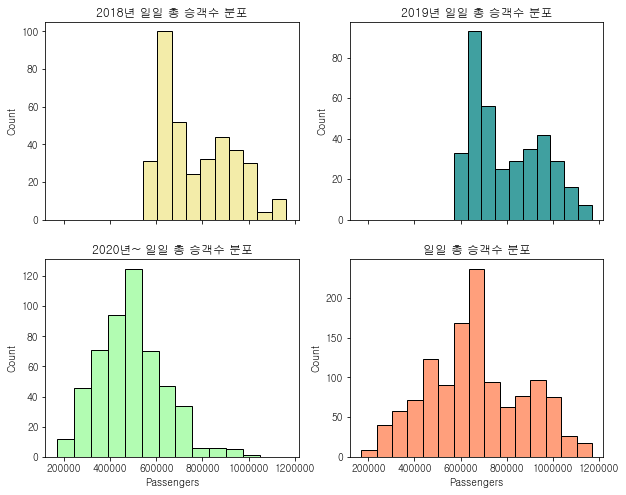

In [30]:
# 히스토그램을 통해 기간별 일일 총 승객수 분포 시각화
f,axes = plt.subplots(2,2,figsize=(10,8), sharex=True)

sns.histplot(df_day_sum['2018']['Passengers'], color='khaki', bins=10, ax=axes[0,0])
sns.histplot(df_day_sum['2019']['Passengers'], color='teal', bins=10, ax=axes[0,1])
sns.histplot(df_day_sum['2020':]['Passengers'], color='palegreen', bins=12, ax=axes[1,0])
sns.histplot(df_day_sum['Passengers'], color='coral', bins=15, ax=axes[1,1])

axes[0, 0].title.set_text("2018년 일일 총 승객수 분포")
axes[0, 1].title.set_text("2019년 일일 총 승객수 분포")
axes[1, 0].title.set_text("2020년~ 일일 총 승객수 분포")
axes[1, 1].title.set_text("일일 총 승객수 분포")

plt.show()

일일 총 승객수 분포는 평균 70만명 정도의 대략적인 정규분포 형태를 띄고 있다. 그러나, 기간별로 나누면 2018년과 2019년은 일별 60만명 ~ 120만명의 승객수 분포를 보이는 반면, 2020년부터는 20만명 ~ 80만명의 승객수 분포를 보인다. 2018년과 2019년에 비해 2020년부터 승객수가 급감했음을 알 수 있다.

In [31]:
# 월평균 일일 승객수
df_month_daymean = df_day_sum.resample('m').mean()
df_month_daymean.head()

Passengers
Date                     
2018-01-31  708744.709677
2018-02-28  802123.642857
2018-03-31  741484.193548
2018-04-30  776326.266667
2018-05-31  815535.290323

In [32]:
# 월평균 일일 승객수 시각화
plt.figure(figsize=(10,4))
sns.lineplot(data=df_month_daymean, markers=True)
plt.title('월평균 일일 승객수')
plt.ylabel('Passengers')
plt.show()

2018년부터 2020년 2월까지는 꾸준히 일일 80만명의 승객수를 유지했으나 2020년 초 코로나의 영향으로 승객수가 급감하였고, 이후에는 일일 50만명까지 회복했음을 알 수 있다.

In [33]:
# 2018년부터 2021년 5월까지 승객 수가 가장 많았던 역 TOP5, 가장 적었던 역 TOP5
df_station_day_sum.sum().sort_values(ascending=False)

Station
서울     101789573.0
동대구     54420038.0
용산      49520433.0
대전      45934334.0
부산      42320453.0
          ...     
선평           413.0
제물포          398.0
덕정           376.0
비동           281.0
운천            32.0
Length: 291, dtype: float64

2018년부터 2021년 5월까지의 역별 총 승객수가 가장 많았던 5개 역과 가장 적었던 5개 역을 알 수 있다.

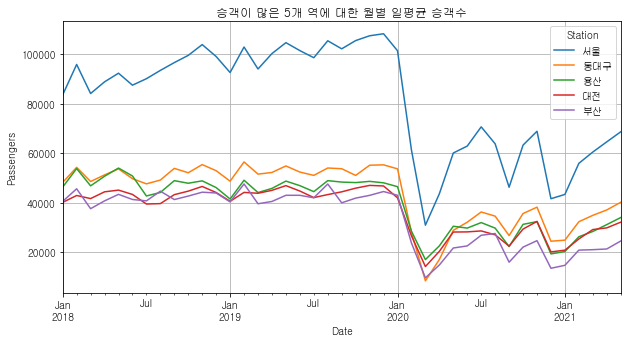

In [34]:
# 2018년 1월부터 2021년 5월까지 총 승객수가 가장 많았던 5개 역의 월별 일평균 승객수 시각화
df_station_day_sum[['서울', '동대구', '용산', '대전', '부산']].resample('m').mean().plot(grid=True, figsize=(10,5))
plt.title('승객이 많은 5개 역에 대한 월별 일평균 승객수')
plt.ylabel('Passengers')
plt.show()

가장 많았던 5개 역에 대한 그래프와 앞서 본 월별 일평균 총 승객수 그래프가 비슷한 추세였음을 볼 수 있다. 2018년부터 2019년까지 비슷한 승객수를 유지하고, 2020년 초 급감 이후 현재까지 점차 회복세이다.

In [35]:
# 승객이 가장 적었던 운천역의 일일 승객수 시각화
df_station_day_sum['운천'].plot(grid=True, figsize=(8,4))
plt.title('운천역의 일일 승객수')
plt.ylabel('Passengers')
plt.show()

운천역은 2019년 9월 이후로 운행하지 않음을 확인할 수 있다.

In [36]:
# 열차종별 일일 총 승객수 데이터 생성
type_day_sum = df_station['Passengers'].groupby([df_station['Date'], df_station['Train Type']]).sum()
df_type_day_sum = type_day_sum.unstack()
df_type_day_sum.fillna(0, inplace=True)
df_type_day_sum.head()

Train Type  ITX-경부  ITX-새마을   ITX-청춘       KTX   KTX-산천  KTX-이음   KTX-호남  \
Date                                                                       
2018-01-01     0.0  62394.0  36366.0  306607.0  81456.0     0.0  47933.0   
2018-01-02  1176.0  34316.0  27994.0  222587.0  61297.0     0.0  34591.0   
2018-01-03   856.0  29588.0  25448.0  183951.0  55611.0     0.0  29772.0   
2018-01-04   880.0  29610.0  26186.0  196806.0  57795.0     0.0  31288.0   
2018-01-05  1550.0  42946.0  30774.0  280979.0  74735.0     0.0  28469.0   

Train Type  공항버스   기타      누리로      무궁화호     새마을호    통근열차  
Date                                                       
2018-01-01   0.0  0.0  10534.0  320914.0  13908.0  2138.0  
2018-01-02   0.0  0.0   8716.0  269986.0   9310.0  1796.0  
2018-01-03   0.0  0.0   7428.0  241714.0   9996.0  1644.0  
2018-01-04   0.0  0.0   7726.0  242407.0  10542.0  1672.0  
2018-01-05   0.0  0.0   9734.0  302699.0  13144.0  1946.0

In [37]:
# 2018년부터 2021년 5월까지 열차종별 총 승객수
df_type_day_sum.sum().sort_values(ascending=False)

Train Type
무궁화호       314279693.0
KTX        282434159.0
KTX-산천      82348384.0
ITX-새마을     49588074.0
ITX-청춘      35268390.0
KTX-호남      34744742.0
새마을호        13966415.0
누리로         10324098.0
공항버스         1863706.0
통근열차         1315830.0
KTX-이음        902360.0
기타            389196.0
ITX-경부         61828.0
dtype: float64

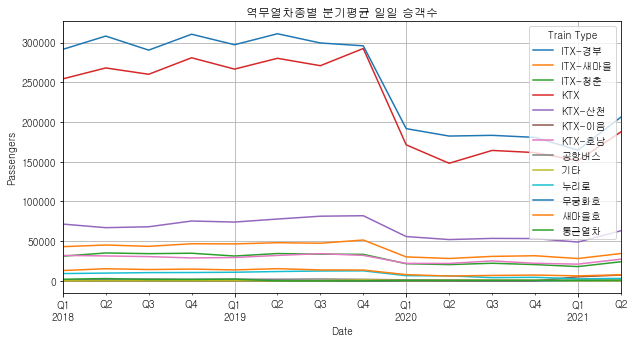

In [38]:
# 열차종별 분기평균 일일 승객수 시각화
df_type_day_sum.resample('Q').mean().plot(grid=True, figsize=(10,5))
plt.title('역무열차종별 분기평균 일일 승객수')
plt.ylabel('Passengers')
plt.show()

무궁화호, KTX도 2018년과 2019년에 비해 2020년 급감했음을 알 수 있다.

In [39]:
df_type_day_sum.resample('Q').mean().plot(grid=True, figsize=(10,5))
plt.title('역무열차종별 분기평균 일일 승객수')
plt.ylabel('Passengers')
plt.ylim(0,85000) # y축 범위 지정
plt.show()

다른 열차종도 마찬가지로 2020년 급감하는 추세를 보인다. 대신 승객수가 더 적은 열차종일수록 2020년 초 승객 감소비율이 줄어든다.

In [40]:
# 상하행별 일일 총 승객수 데이터 생성
updown_day_sum = df_station['Passengers'].groupby([df_station['Date'], df_station['Up or Down']]).sum()
df_updown_day_sum = updown_day_sum.unstack()
df_updown_day_sum.fillna(0, inplace=True)
df_updown_day_sum.drop('상하행', axis='columns', inplace=True)
df_updown_day_sum.head()

Up or Down        상행        하행
Date                          
2018-01-01  501329.0  380921.0
2018-01-02  355530.0  316239.0
2018-01-03  297275.0  288733.0
2018-01-04  308976.0  295936.0
2018-01-05  399623.0  387353.0

In [41]:
# 토요일의 상하행별 일일 총 승객수 시각화
plt.figure(figsize=(10,4))
sns.lineplot(data=df_updown_day_sum.query('Date.dt.dayofweek == 5'))
plt.title('토요일의 상하행별 일일 승객수')
plt.ylabel('Passengers')
plt.show()

토요일은 전체적으로 하행선의 승객수가 더 많은 것을 볼 수 있다.

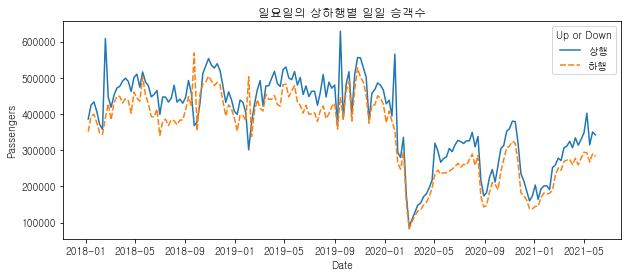

In [42]:
# 일요일의 상하행별 일일 총 승객수 시각화
plt.figure(figsize=(10,4))
sns.lineplot(data=df_updown_day_sum.query('Date.dt.dayofweek == 6'))
plt.title('일요일의 상하행별 일일 승객수')
plt.ylabel('Passengers')
plt.show()

일요일은 전체적으로 상행선의 승객수가 더 많은 것을 볼 수 있다.

### 2) 역 위치, 행정구역별 역 분포 시각화 (지도)

In [43]:
import folium
import json

In [44]:
#역별 위치정보 파일 읽고 address column의 일부를 받아 행정구역 column 생성
df_station_location = pd.read_excel('역별 주소정보.xlsx')
district = df_station_location['ADDRESS'].str.split(n=3, expand=True)
df_station_location['DISTRICT'] = district[1]
df_station_location

GUBUN LINE  STATION                     ADDRESS  LONGTITUDE   LATITUDE  \
0      광역  경부선  가산디지털단지       서울특별시 금천구 가산동 벚꽃로 309  126.882689  37.481505   
1      여객  가야선       가야             부산 부산진구 백양대로 91  129.039744  35.160446   
2      광역  경춘선       가평       경기도 가평군 가평읍 문화로 13-42  127.510842  37.814459   
3      여객  호남선       강경      충남 논산시 강경읍 대흥로 1 강경역무실  127.015992  36.153991   
4      여객  동해선       강구         경상북도 영덕군 강구면 강산로 67  129.370110  36.352495   
..    ...  ...      ...                         ...         ...        ...   
288    여객  경부선       황간  충북 영동군 황간면 하옥포2길 14  황간역무실  127.912289  36.224222   
289    광역  경원선       회기       서울시 동대문구 회기로 196(휘경동)  127.056409  37.588837   
290    광역  경원선       회룡            경기도 의정부시 평화로 363  127.047466  37.724344   
291    여객  경강선       횡성         강원도 횡성군 횡성읍 덕고로 591  128.007793  37.483013   
292    여객  경전선       효천             광주 남구 송하동 573-8  126.877114  35.102955   

    CITY DISTRICT  
0     서울      금천구  
1     부산     부산진구  
2     가평      가평군  
3     논산      논산시  
4     영덕      영덕군  
..   ...      ...  
288   영동      영동군  
289   서울     동대문구  
290  의정부     의정부시  
291   횡성      횡성군  
292   광주       남구  

[293 rows x 8 columns]

In [45]:
# 행정구역별 역 수 데이터 생성
df_station_city = pd.DataFrame(df_station_location.groupby(['DISTRICT'])['STATION'].count())
df_station_city.columns = ['역 수']
df_station_city.sort_values(by='역 수', ascending=False).head()

역 수
DISTRICT     
고양시        10
성남시         9
강남구         7
양평군         6
경주시         6

In [46]:
# 대한민국 행정구역 json 파일 읽기
with open('TL_SCCO_SIG.json',mode='rt', encoding='utf-8-sig') as f:
    geo = json.loads(f.read())
    f.close()

In [47]:
# 지도 시각화
map = folium.Map(
    location=[36.2906329,128.1665848],
    zoom_start=8
)

# json 파일로 행정구역 시각화
folium.GeoJson(
    geo,
    name='korea_municipalities'
).add_to(map)
map

# 역 마킹하기
for i in range(len(df_station_location)):
    folium.features.CircleMarker(
        [df_station_location.loc[i]['LATITUDE'], df_station_location.loc[i]['LONGTITUDE']],
        popup=df_station_location.loc[i]['STATION'],
        radius=5
    ).add_to(map)

# 행정구역의 역 수 시각화
folium.Choropleth(data=df_station_city['역 수'], 
                  geo_data=geo, 
                  columns=[df_station_city.index, df_station_city['역 수']], 
                  key_on='feature.properties.SIG_KOR_NM',
                  fill_color="BuPu",
                  bins=7
                  ).add_to(map)
map

행정구역별로 코레일의 역이 얼마나 있는지를 시각적으로 알 수 있다. 향후 행정구역의 인구수, 역별 승객수 등의 데이터를 바탕으로 어느 행정구역에 역을 더 지어야 하는지를 파악할 수 있다.

### 3) 요일별 승객 수 시각화 (Pie Chart)

In [48]:
# 각 요일에 코레일을 이용한 승객 수
week_of_the_day = df_client['운행요일'].value_counts()
week_of_the_day

금    283673
일    271703
토    266981
월    216568
목    207371
수    193223
화    192630
Name: 운행요일, dtype: int64

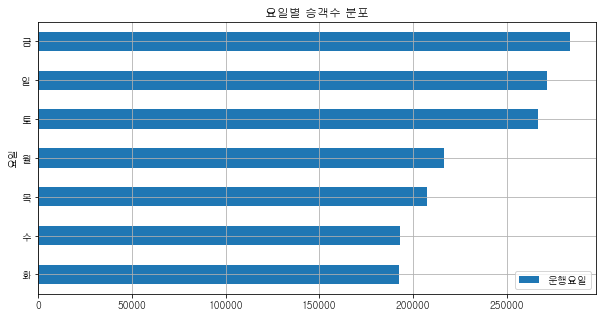

In [49]:
# 요일별 승객수 시각화
week_of_the_day.sort_values().plot(kind='barh', figsize=(10,5), grid=True)
plt.title('요일별 승객수 분포')
plt.legend(loc="best")
plt.ylabel("요일")
plt.show()

금요일에 이용 승객이 제일 많았음을 알 수 있고, 화요일에 제일 적었음을 알 수 있다.

In [50]:
# 파이 차트로 시각화
week_of_the_day.plot(kind='pie', figsize=(8,5), autopct='%.2f')
plt.title('요일별 승객수 분포')
plt.legend(loc="best")
plt.ylabel("요일")
plt.show()

금요일에 코레일 이용 승객이 17.38%로 가장 많았고, 금,토,일의 승객 수가 전체 승객 수의 약 50%를 차지한다.

### 4) 운행영업일 단계별 열차종 상관관계 시각화 (Heatmap)

In [51]:
# 운행영업일 단계별 열차종의 평균 승객수 데이터 생성
type_level_sum = df_station['Passengers'].groupby([df_station['Train Type'], df_station['Day Level']]).mean()
df_type_level_sum = type_level_sum.unstack()
df_type_level_sum.fillna(0, inplace=True)
df_type_level_sum = df_type_level_sum.T
df_type_level_sum

Train Type      ITX-경부     ITX-새마을       ITX-청춘          KTX      KTX-산천  \
Day Level                                                                  
공휴일           0.000000  324.576122  1563.153005  1485.583051  451.856879   
명절대수송       203.875000  390.596000  1389.334088  2042.274692  565.743191   
주중           55.753788  209.860275   854.351977  1330.492206  419.565762   
평일           86.690476  269.562574   967.866194  1661.988423  479.023534   
표준            0.000000  373.660049  1584.162928  1736.022033  518.094551   

Train Type      KTX-이음      KTX-호남        공항버스         기타         누리로  \
Day Level                                                               
공휴일         411.407407  484.195006  330.688172   0.000000   93.797040   
명절대수송       292.955556  676.388916  253.105769  33.806452  100.913793   
주중          275.532957  357.251430  264.788362  20.276286   76.337093   
평일          346.647222  440.655078  299.661467  30.924205   91.410737   
표준          431.545706  567.923046  328.587007   8.140503   99.881841   

Train Type        무궁화호        새마을호        통근열차  
Day Level                                       
공휴일         340.407106  128.792295  169.629091  
명절대수송       374.938694   98.801342  127.677419  
주중          282.628098   99.235662  123.400158  
평일          333.410620  139.352254  136.888802  
표준          354.616137  128.988911  160.187919

In [52]:
# 운행영업일 단계에 따른 열차종 분포 시각화
df_type_level_sum.T.plot(kind='bar', figsize=(12,6))
plt.title("운행영업일 단계별 열차종 분포")
plt.ylabel("Passengers")
plt.show()

ITX-청춘은 명절대수송 기간보다 공휴일에 더 승객이 많고, 휴일 승객수가 평일 승객수의 약 2배를 차지한다. KTX는 공휴일보다 평일에 오히려 더 승객이 많고, 명절대수송 기간엔 압도적으로 많은 승객수를 보인다.

In [53]:
# 상관계수 생성
corr = df_type_level_sum.corr()

In [54]:
# 상관계수에 대한 히트맵 시각화
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=1, cmap='Blues')
plt.title("영업일단계에 대한 열차종별 상관관계")
plt.show()

더 짙은 파란색일수록 강한 양의 상관관계, 흰색일수록 강한 음의 상관관계를 의미한다. 1에 가깝다면 두 열차종이 운행영업일 단계별로 비슷한 승객수 분포를 가지는 것이며, -1에 가깝다면 두 열차종이 운행영업일 단계별로 반대의 승객수 분포를 가지게 된다.

In [55]:
sns.clustermap(corr, figsize=(8,8), cmap='Blues')

운행영업일 단계별로 비슷한 승객수 분포를 보이는 열차종끼리 묶은 것을 나타낸 것이다. 크게 3개의 cluster로 나뉘는 것을 볼 수 있는데, 무궁화호, KTX, KTX-호남, KTX-산천, 누리로, ITX-새마을이 같은 cluster로 묶인다.

### 5) 열차종별 연령대, 성별 분포 시각화 (Countplot)

In [56]:
# 고객 데이터에서 연령대와 역무열차종 column만 추출해 새로운 데이터프레임 생성
df_age_train = df_client[['연령대', '역무열차종']].dropna()
df_age_train

연령대   역무열차종
670      20대    무궁화호
671      20대    무궁화호
672      20대    무궁화호
673      20대    무궁화호
674      30대    무궁화호
...      ...     ...
1632175  20대    무궁화호
1632176  20대    무궁화호
1632177  30대    무궁화호
1632178  40대    무궁화호
1632179  50대  KTX-호남

[1354777 rows x 2 columns]

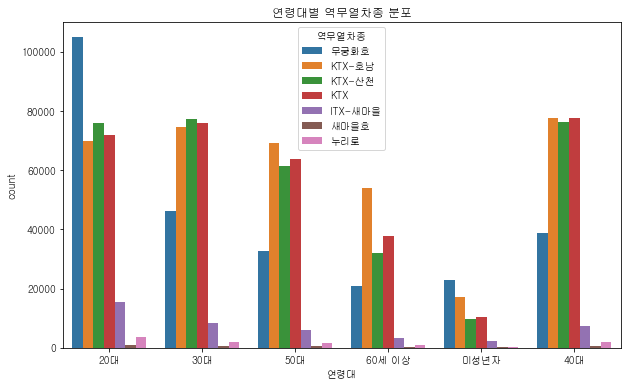

In [57]:
# countplot을 이용해 연령대별 역무열차종 분포 시각화
plt.figure(figsize=(10,6))
sns.countplot(x='연령대', hue='역무열차종', data=df_age_train)
plt.title("연령대별 역무열차종 분포")
plt.show()

미성년자, 20대는 KTX보다 무궁화호를 타는 비율이 높은 반면, 30대부터는 KTX를 타는 비율이 높다. 또한, 나이가 많을수록 KTX-호남 열차를 타는 비율이 증가함을 알 수 있다.

In [58]:
# 고객 데이터에서 성별과 역무열차종 column만 추출해 새로운 데이터프레임 생성
df_sex_train = df_client[['성별', '역무열차종']].dropna()
df_sex_train.head()

성별 역무열차종
670  F  무궁화호
671  F  무궁화호
672  M  무궁화호
673  M  무궁화호
674  M  무궁화호

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x='성별', hue='역무열차종', data=df_sex_train)
plt.title("성별에 따른 역무열차종 분포")
plt.show()

여성 승객의 무궁화호 탑승 비율이 남성 승객의 무궁화호 탑승 비율보다 더 높음을 알 수 있다.

## 4. 데이터 변환

In [60]:
# 고객 특성 데이터 결측치 확인
df_client.isnull().sum()

운행일자            0
운행요일            0
구분              0
출발시간대           0
성별         276907
연령대        277372
고객등급_현재    276907
출발역코드           0
출발역명            0
도착역코드           0
도착역명            0
상하행구분           0
노선              0
역무열차종코드         0
역무열차종           0
인원              0
dtype: int64

In [61]:
# 성별, 연령대, 고객등급 column 제거
df_client.dropna(axis='columns', inplace=True)
df_client.head()

운행일자 운행요일   구분  출발시간대    출발역코드 출발역명    도착역코드   도착역명 상하행구분    노선  \
0  20190301    금  비회원    0.0  3900248   전주  3900211     익산     U   943   
1  20190301    금  비회원    0.0  3900248   전주  3900259     남원     D  1040   
2  20190301    금  비회원    0.0  3900248   전주  3900279  여수엑스포     D  1040   
3  20190301    금  비회원    2.0  3900248   전주  3900276     여천     D  1040   
4  20190301    금  비회원    2.0  3900248   전주  3900259     남원     D  1040   

   역무열차종코드 역무열차종  인원  
0        2  무궁화호  12  
1        2  무궁화호   4  
2        2  무궁화호   1  
3        2  무궁화호   3  
4        2  무궁화호   4

In [62]:
# column 값의 type 확인
df_client.dtypes

운행일자         int64
운행요일        object
구분          object
출발시간대      float64
출발역코드        int64
출발역명        object
도착역코드        int64
도착역명        object
상하행구분       object
노선           int64
역무열차종코드      int64
역무열차종       object
인원           int64
dtype: object

In [63]:
# categorical data를 one-hot-encoding을 통해 numerical data로 변환
df_for_one_hot_encoding = df_client[['운행요일', '상하행구분', '역무열차종']]
one_hot_encoded_df = pd.get_dummies(df_for_one_hot_encoding)
one_hot_encoded_df

운행요일_금  운행요일_목  운행요일_수  운행요일_월  운행요일_일  운행요일_토  운행요일_화  상하행구분_D  \
0             1       0       0       0       0       0       0        0   
1             1       0       0       0       0       0       0        1   
2             1       0       0       0       0       0       0        1   
3             1       0       0       0       0       0       0        1   
4             1       0       0       0       0       0       0        1   
...         ...     ...     ...     ...     ...     ...     ...      ...   
1632175       0       0       0       1       0       0       0        1   
1632176       0       0       0       1       0       0       0        0   
1632177       0       0       0       1       0       0       0        1   
1632178       0       0       0       1       0       0       0        0   
1632179       0       0       0       1       0       0       0        1   

         상하행구분_U  역무열차종_ITX-새마을  역무열차종_KTX  역무열차종_KTX-산천  역무열차종_KTX-호남  \
0              1              0          0             0             0   
1              0              0          0             0             0   
2              0              0          0             0             0   
3              0              0          0             0             0   
4              0              0          0             0             0   
...          ...            ...        ...           ...           ...   
1632175        0              0          0             0             0   
1632176        1              0          0             0             0   
1632177        0              0          0             0             0   
1632178        1              0          0             0             0   
1632179        0              0          0             0             1   

         역무열차종_누리로  역무열차종_무궁화호  역무열차종_새마을호  
0                0           1           0  
1                0           1           0  
2                0           1           0  
3                0           1           0  
4                0           1           0  
...            ...         ...         ...  
1632175          0           1           0  
1632176          0           1           0  
1632177          0           1           0  
1632178          0           1           0  
1632179          0           0           0  

[1632149 rows x 16 columns]

In [64]:
# 변환한 데이터를 고객 데이터에 합치기
df_client = pd.concat([df_client, one_hot_encoded_df], axis=1)
df_client

운행일자 운행요일   구분  출발시간대    출발역코드 출발역명    도착역코드   도착역명 상하행구분    노선  \
0        20190301    금  비회원    0.0  3900248   전주  3900211     익산     U   943   
1        20190301    금  비회원    0.0  3900248   전주  3900259     남원     D  1040   
2        20190301    금  비회원    0.0  3900248   전주  3900279  여수엑스포     D  1040   
3        20190301    금  비회원    2.0  3900248   전주  3900276     여천     D  1040   
4        20190301    금  비회원    2.0  3900248   전주  3900259     남원     D  1040   
...           ...  ...  ...    ...      ...  ...      ...    ...   ...   ...   
1632175  20210531    월   회원   23.0  3900195  서대전  3900248     전주     D  1040   
1632176  20210531    월   회원   23.0  3900259   남원  3900248     전주     U   943   
1632177  20210531    월   회원   23.0  3900195  서대전  3900248     전주     D  1040   
1632178  20210531    월   회원   23.0  3900271   순천  3900248     전주     U   943   
1632179  20210531    월   회원   23.0  3900141   만종  3900587     강릉     D  2134   

         ...  운행요일_화 상하행구분_D  상하행구분_U  역무열차종_ITX-새마을  역무열차종_KTX  역무열차종_KTX-산천  \
0        ...       0       0        1              0          0             0   
1        ...       0       1        0              0          0             0   
2        ...       0       1        0              0          0             0   
3        ...       0       1        0              0          0             0   
4        ...       0       1        0              0          0             0   
...      ...     ...     ...      ...            ...        ...           ...   
1632175  ...       0       1        0              0          0             0   
1632176  ...       0       0        1              0          0             0   
1632177  ...       0       1        0              0          0             0   
1632178  ...       0       0        1              0          0             0   
1632179  ...       0       1        0              0          0             0   

         역무열차종_KTX-호남  역무열차종_누리로  역무열차종_무궁화호  역무열차종_새마을호  
0                   0          0           1           0  
1                   0          0           1           0  
2                   0          0           1           0  
3                   0          0           1           0  
4                   0          0           1           0  
...               ...        ...         ...         ...  
1632175             0          0           1           0  
1632176             0          0           1           0  
1632177             0          0           1           0  
1632178             0          0           1           0  
1632179             1          0           0           0  

[1632149 rows x 29 columns]

In [65]:
# 남은 categorical data column들을 제거
df_client.drop(['출발역명', '도착역명', '운행요일', '상하행구분', '역무열차종'], axis=1, inplace=True)

In [66]:
# class label을 제외힌 column들의 값을 X로 설정
X = df_client.loc[:, df_client.columns != '구분']

In [67]:
# class label을 numerical data로 변환해 새로운 column에 추가
label_dict = {'비회원': 0,
              '회원': 1}

df_client['ClassLabel'] = df_client['구분'].map(label_dict)
df_client.tail()

운행일자  구분  출발시간대    출발역코드    도착역코드    노선  역무열차종코드  인원  운행요일_금  \
1632175  20210531  회원   23.0  3900195  3900248  1040        2   1       0   
1632176  20210531  회원   23.0  3900259  3900248   943        2   1       0   
1632177  20210531  회원   23.0  3900195  3900248  1040        2   2       0   
1632178  20210531  회원   23.0  3900271  3900248   943        2   1       0   
1632179  20210531  회원   23.0  3900141  3900587  2134       10   1       0   

         운행요일_목  ...  상하행구분_D  상하행구분_U  역무열차종_ITX-새마을  역무열차종_KTX  \
1632175       0  ...        1        0              0          0   
1632176       0  ...        0        1              0          0   
1632177       0  ...        1        0              0          0   
1632178       0  ...        0        1              0          0   
1632179       0  ...        1        0              0          0   

         역무열차종_KTX-산천  역무열차종_KTX-호남  역무열차종_누리로  역무열차종_무궁화호  역무열차종_새마을호  \
1632175             0             0          0           1           0   
1632176             0             0          0           1           0   
1632177             0             0          0           1           0   
1632178             0             0          0           1           0   
1632179             0             1          0           0           0   

         ClassLabel  
1632175           1  
1632176           1  
1632177           1  
1632178           1  
1632179           1  

[5 rows x 25 columns]

In [68]:
# class label 정의
y = df_client['ClassLabel']
y

0          0
1          0
2          0
3          0
4          0
          ..
1632175    1
1632176    1
1632177    1
1632178    1
1632179    1
Name: ClassLabel, Length: 1632149, dtype: int64

In [113]:
# training set, test set 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (1142504, 23)
y_train.shape: (1142504,)
X_test.shape: (489645, 23)
y_test.shape: (489645,)


In [114]:
# 특정 비율로 무작위 추출
X_train = X_train.sample(frac=0.01)
y_train = y_train.sample(frac=0.01)
X_test = X_test.sample(frac=0.01)
y_test = y_test.sample(frac=0.01)

print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (11425, 23)
y_train.shape: (11425,)
X_test.shape: (4896, 23)
y_test.shape: (4896,)


## 5. 고객 회원 여부 예측

### 1) k-Nearest Neighbors

In [115]:
# k가 1부터 30일 때의 knn 모델링
from sklearn.neighbors import KNeighborsClassifier

neighbors = range(1, 30, 2)

training_scores = []
test_scores = []

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    print(f"k = {n_neighbors}, accuracy = {knn.score(X_test, y_test)*100:.2f}%")

plt.figure()
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

k = 1, accuracy = 73.26%
k = 3, accuracy = 78.62%
k = 5, accuracy = 81.50%
k = 7, accuracy = 82.78%
k = 9, accuracy = 83.23%
k = 11, accuracy = 83.62%
k = 13, accuracy = 83.80%
k = 15, accuracy = 83.82%
k = 17, accuracy = 83.84%
k = 19, accuracy = 83.86%
k = 21, accuracy = 83.86%
k = 23, accuracy = 83.86%
k = 25, accuracy = 83.86%
k = 27, accuracy = 83.86%
k = 29, accuracy = 83.86%


In [121]:
# cross-validation을 이용해 knn 모델링
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = X_train.sample(frac=0.001)
y_train = y_train.sample(frac=0.001)
X_test = X_test.sample(frac=0.001)
y_test = y_test.sample(frac=0.001)

cross_val_scores = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))
    
print(f"best cross-validation score: {np.max(cross_val_scores):.3}")
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print(f"test-set score: {knn.score(X_test, y_test):.3f}")

best cross-validation score: 0.831
best n_neighbors: 19
test-set score: 0.858


In [124]:
# GridSearch를 이용해 knn 모델링
from sklearn.model_selection import GridSearchCV

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
    X_train = X_train.sample(frac=0.001)
    y_train = y_train.sample(frac=0.001)
    X_test = X_test.sample(frac=0.001)
    y_test = y_test.sample(frac=0.001)

    param_grid = {'n_neighbors':  np.arange(1, 30, 2),
             'metric': ['manhattan', 'euclidean', 'cosine']}
    grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10,
                   return_train_score=True)
    grid.fit(X_train, y_train)
    print(f"best parameters: {grid.best_params_}")

    print(f"test-set score: {grid.score(X_test, y_test):.3f}")

best parameters: {'metric': 'euclidean', 'n_neighbors': 15}
test-set score: 0.843
best parameters: {'metric': 'manhattan', 'n_neighbors': 23}
test-set score: 0.838
best parameters: {'metric': 'manhattan', 'n_neighbors': 17}
test-set score: 0.828
best parameters: {'metric': 'manhattan', 'n_neighbors': 25}
test-set score: 0.848
best parameters: {'metric': 'manhattan', 'n_neighbors': 17}
test-set score: 0.836
best parameters: {'metric': 'manhattan', 'n_neighbors': 15}
test-set score: 0.833
best parameters: {'metric': 'manhattan', 'n_neighbors': 17}
test-set score: 0.863
best parameters: {'metric': 'manhattan', 'n_neighbors': 11}
test-set score: 0.828
best parameters: {'metric': 'cosine', 'n_neighbors': 7}
test-set score: 0.797
best parameters: {'metric': 'manhattan', 'n_neighbors': 13}
test-set score: 0.828
